In [8]:
# IMPORT DATA :

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split


df =pd.read_csv("C:/Users/Michel/Documents/IntroML/HousingData/HousingData_post_treatment.csv")

df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130,0.693333


In [4]:
x = df.drop('MEDV', axis=1)
y = df['MEDV']


X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

Text(0.5, 1.0, 'hp')

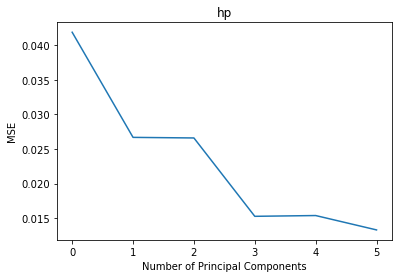

In [10]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import scale 

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(x))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [11]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)


array([ 45.11,  56.47,  65.89,  72.38,  78.43,  83.32,  87.58,  90.65,
        93.27,  95.15,  96.87,  98.32,  99.55, 100.02])

In [13]:
from sklearn.metrics import mean_squared_error

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

0.1706929853299161

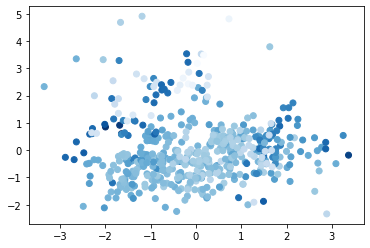

In [27]:
plt.scatter(X_reduced[:,1],X_reduced[:,2],c=X_reduced[:,3],cmap='Blues')